In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/praktikum_ml/praktikum07"

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [29]:
import pandas as pd
df = pd.read_csv(path + "/data/apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [31]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [32]:
df["Class"].unique()

array(['orange', 'apple'], dtype=object)

In [33]:
print(df["Class"].value_counts())

Class
orange    20
apple     20
Name: count, dtype: int64


In [34]:
df.isnull().sum()

,0
Weight,0
Size,0
Class,0


In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Weight,Size
Weight,1.000000,0.765027
Size,0.765027,1.000000


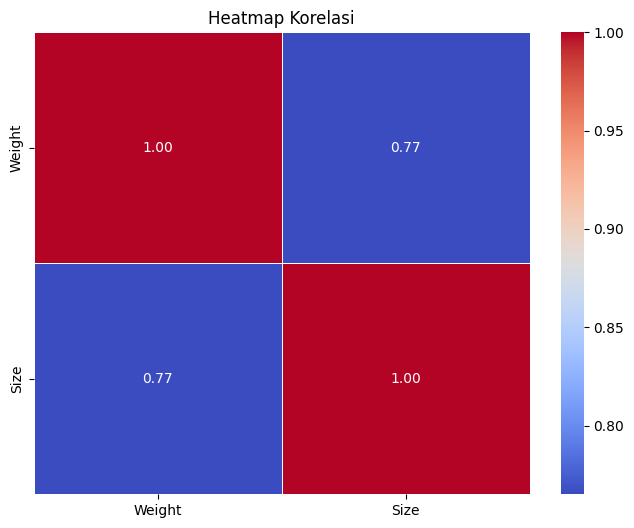

In [37]:
# Visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi", fontsize=12)
plt.show()

In [38]:
# Menentukan fitur dan target
X = df.drop(columns=['Class'])
y = df['Class']
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (40, 2)
y.shape: (40,)


In [39]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [40]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [63]:
# Membagi dataset training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
)

print("Data Training: ", len(X_train))
print("Data Testing: ", len(X_test))

Data Training:  32
Data Testing:  8


In [64]:
# Membuat model SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
y_pred = model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         5
      orange       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[5 0]
 [0 3]]


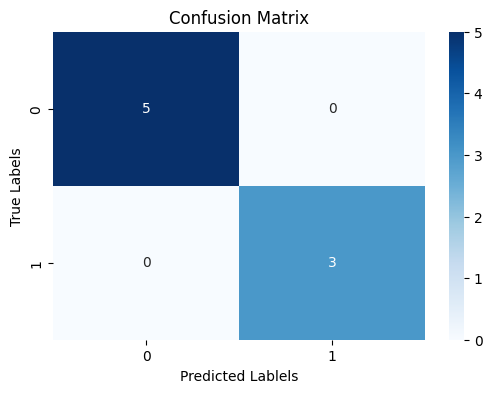

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Lablels")
plt.ylabel("True Labels")
plt.show()

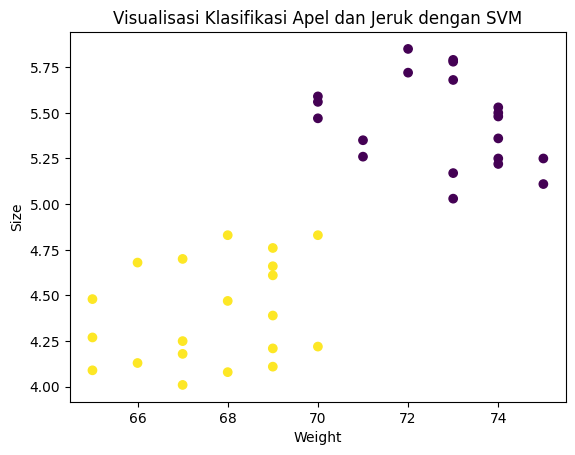

In [57]:
#Visualisasi model svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode the 'Class' column
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Class'])

plt.scatter(df['Weight'], df['Size'], c=df['ClassEncoded'])
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Visualisasi Klasifikasi Apel dan Jeruk dengan SVM')
plt.show()

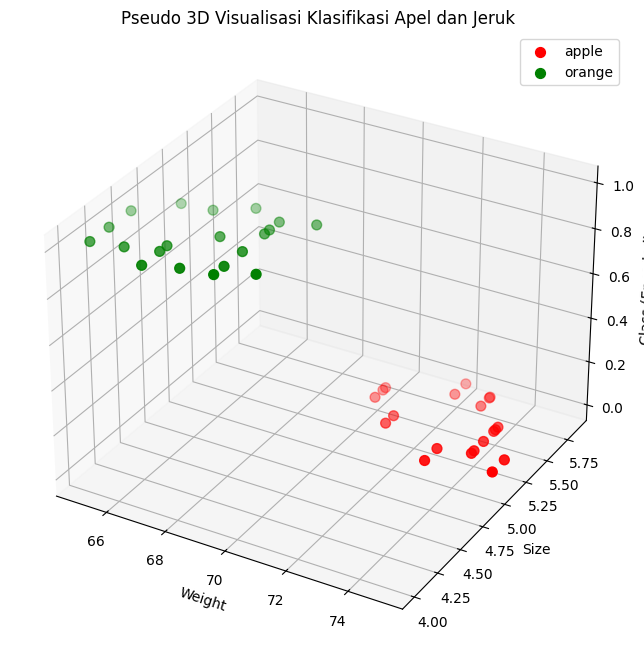

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
labels = le.classes_

for i, species in enumerate(labels):
  subset = df[df['ClassEncoded'] == i]
  ax.scatter(
      subset['Weight'],
      subset['Size'],
      subset['ClassEncoded'],
      color=colors[i],
      label=species,
      s=50
)

ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_zlabel('Class (Encoded)') # Label for the Z-axis
ax.set_title('Pseudo 3D Visualisasi Klasifikasi Apel dan Jeruk')
ax.legend()
plt.show()